# UZOP Projekt

## Prva faza - priprema i vizualizacija podataka

Cilj 1. faze projekta jest:
    - učitati podatke, opisati karakteristike baze podataka
    - prikazati deskriptivnu statistiku podataka (npr. mean studenata, ocjena, informacije o biomedicinskim nizovima)
    - provjera postojanja outliera u podacima, monotonih vrijednosti itd.
    - vizualizirati navedeno (npr. distribucije ,prikaz vremenskih nizova, ovisnosti par danih ulaznih podataka

### Kratak opis teme projekta

Link članka je [ovdje](https://ieeexplore.ieee.org/document/9744065)

Projekt je baziran na članku na navedenom linku. U članku je opisano istraživanje koje se bavi predviđanjem ocjena s obzirom na razinu stresa, i to mjerenjem nekih fizioloških indikatora stresa. U istraživanju je mjerena vodljivost i temperatura kože kod 10 studenata tijekom 3 različita ispita. Praćenje navedenih fizikalnih veličina izvedeno je tako da su studenti nosili uređaje nalik ručnim satovima. Dobiveni podaci su filtrirani radi dobivanja određenih trendova pomoću kojih bi predviđanje ocjena bilo omogućeno. Točnosti klasifikacije kreću se između 70 i 80%. Linije trendova su pokazale varijacije u razini stresa tijekom ispita. Također, rezultati su pokazali i prisutnost izazova po pitanju prikupljanja podataka pomoću nosivih uređaja.

### Kratak opis skupa podataka

Podaci se nalaze u direktoriju /dataset/Data. Podaci su organizirani u 10 poddirektorija, od S1 do S10, pri čemu svaki predstavlja jednog studenta. Svaki poddirektorij sadrži 3 direktorija, Final, Midterm1 i Midterm2, svaki za jednu od tri vrste ispita.


In [2]:
import glob

import numpy as np
import pandas as pd


## Učitavanje i opis podataka

Svaki direktorij za ispit sadrži 7 csv datoteka. Dodatna datoteka info.txt sadrži kratak opis sadržaja svake od pojedinih csv datoteka.

U nastavku će biti opisan sadržaj csv datoteka. Funkcija ``create_student_exam_data`` za dotičnog studenta i vrstu ispita stvara tablični prikaz podataka iz csv datoteka i to putem DataFrame objekta

In [32]:
import glob

def create_student_exam_data(student, exam):
    spath = f"{student}\\{exam}"
    csv_files = glob.glob(f"{spath}\*.csv")
    table = pd.DataFrame()
    for csvf in csv_files:
        if "tags.csv" not in csvf:
            dcsv = pd.read_csv(csvf)
            table = pd.concat([table, dcsv], axis=1)
    return table


In [36]:
from IPython.core.display_functions import display

student_paths = glob.glob(r"dataset/S[0-9]")
student_paths.append("dataset\\S10")
student_exam = list()
exams = ["Midterm 1", "Midterm 2", "Final"]
columns = ["Accelerometer X",
           "Accelerometer Y",
           "Accelerometer Z",
           "Blood volume pulse",
           "Electrodermal activity",
           "Heart rate",
           "Heart beat detection time",
           "Heart beat duration",
           "Temperature"]
for i in range(len(student_paths)):
    st_ex = list()
    for e in exams:
        data = create_student_exam_data(student_paths[i], e)
        data.columns = columns
        data = data.iloc[1:]
        st_ex.append(data)
    student_exam.append(st_ex)


[[        Accelerometer X  Accelerometer Y  Accelerometer Z  Blood volume pulse  \
1                  -3.0            -62.0             12.0               -0.00   
2                  -3.0            -62.0             12.0               -0.00   
3                  -3.0            -62.0             12.0               -0.00   
4                  -3.0            -62.0             12.0               -0.00   
5                  -3.0            -62.0             12.0               -0.00   
...                 ...              ...              ...                 ...   
715403              NaN              NaN              NaN              -21.56   
715404              NaN              NaN              NaN              -21.85   
715405              NaN              NaN              NaN              -20.92   
715406              NaN              NaN              NaN              -18.70   
715407              NaN              NaN              NaN              -15.64   

        Electrodermal act

In [41]:
for i in range(len(student_exam)):
    for j in range(len(student_exam[i])):
        print(f"Student: {i+1}, ispit: {exams[j]}")
        # display(student_exam[i][j])
        print(student_exam[i][j].describe())
        print("<------------------------------->\n")


Student: 1, ispit: Midterm 1
       Accelerometer X  Accelerometer Y  Accelerometer Z  Blood volume pulse  \
count    357702.000000    357702.000000    357702.000000       715407.000000   
mean        -26.481949        10.666591        13.242772           -0.000863   
std          26.971639        36.100694        34.868002            5.831480   
min        -128.000000      -128.000000      -128.000000         -394.110000   
25%         -48.000000        -6.000000        -8.000000           -0.560000   
50%         -31.000000         5.000000        11.000000           -0.030000   
75%          -3.000000        34.000000        49.000000            0.490000   
max         127.000000       127.000000       127.000000          283.960000   

       Electrodermal activity    Heart rate  Heart beat detection time  \
count            44712.000000  11169.000000                 299.000000   
mean                 0.325909    103.113747                5705.698779   
std                  0.52010

### Monotoni atributi

Provjera postojanja monotonih atributa, tj. atributa čija vrijednost jednoliko raste ili pada. Ovdje se to provjerava radi protokola, no s obzirom na prirodu samih podataka i onoga što predstavljaju, niti jedan od atributa neće (barem ne bi trebao) biti monoton.

In [43]:
for i in range(len(student_exam)):
    for j in range(len(student_exam[i])):
        print(f"Student: {i+1}, ispit: {exams[j]}")
        print(student_exam[i][j].nunique())
        print("\n<------------------------------->\n")

Student: 1, ispit: Midterm 1
Accelerometer X               239
Accelerometer Y               238
Accelerometer Z               248
Blood volume pulse           9200
Electrodermal activity       2809
Heart rate                   4705
Heart beat detection time     299
Heart beat duration            36
Temperature                   306
dtype: int64

<------------------------------->

Student: 1, ispit: Midterm 2
Accelerometer X                242
Accelerometer Y                227
Accelerometer Z                248
Blood volume pulse           41485
Electrodermal activity         442
Heart rate                    4434
Heart beat detection time     1289
Heart beat duration             27
Temperature                    709
dtype: int64

<------------------------------->

Student: 1, ispit: Final
Accelerometer X                246
Accelerometer Y                249
Accelerometer Z                253
Blood volume pulse           47624
Electrodermal activity         202
Heart rate             

### Nedostajući podaci

Provjera postojanja nedostajućih podataka. Prema informacijama iz tablica, nema nedostajućih podataka. Prikazane vrijednosti posljedica su konkatenacije stupaca, odnosno dataframeova različitih duljina.

In [44]:
for i in range(len(student_exam)):
    for j in range(len(student_exam[i])):
        print(f"Student: {i+1}, ispit: {exams[j]}")
        print(student_exam[i][j].isna().sum())
        print("\n<------------------------------->\n")

Student: 1, ispit: Midterm 1
Accelerometer X              357705
Accelerometer Y              357705
Accelerometer Z              357705
Blood volume pulse                0
Electrodermal activity       670695
Heart rate                   704238
Heart beat detection time    715108
Heart beat duration          715108
Temperature                  670695
dtype: int64

<------------------------------->

Student: 1, ispit: Midterm 2
Accelerometer X              356369
Accelerometer Y              356369
Accelerometer Z              356369
Blood volume pulse                0
Electrodermal activity       668201
Heart rate                   701618
Heart beat detection time    711456
Heart beat duration          711456
Temperature                  668201
dtype: int64

<------------------------------->

Student: 1, ispit: Final
Accelerometer X               748689
Accelerometer Y               748689
Accelerometer Z               748689
Blood volume pulse                 0
Electrodermal activity 

### Stršeći podaci

Provjera postojanja stršećih vrijednosti (outliera) u podacima. Dobar način za njihovu detekciju jest vizualizacija podataka. Stoga, prikazat ćemo trend, tj. kretanje vrijednosti svakog atributa kroz trajanje ispita. Kao primjer, prikazana je vizualizacija vrijednosti atributa za prvog studenta (S1).

Student 1, traženje potencijalnih outliera vizualizacijom


c:\users\jakov\desktop\diplomski_studij\1. semestar\strojno_učenje_1\su1_labosi\lab1\lab2\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\users\jakov\desktop\diplomski_studij\1. semestar\strojno_učenje_1\su1_labosi\lab1\lab2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


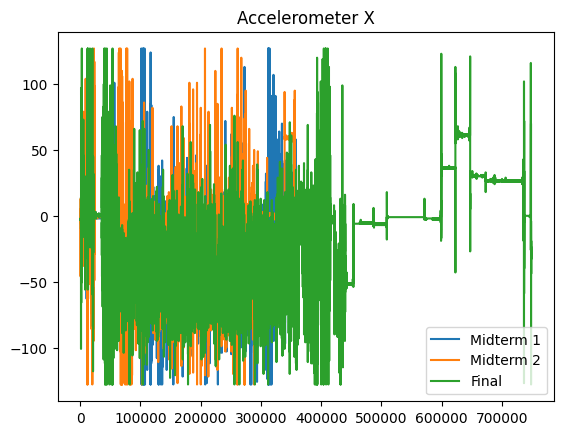

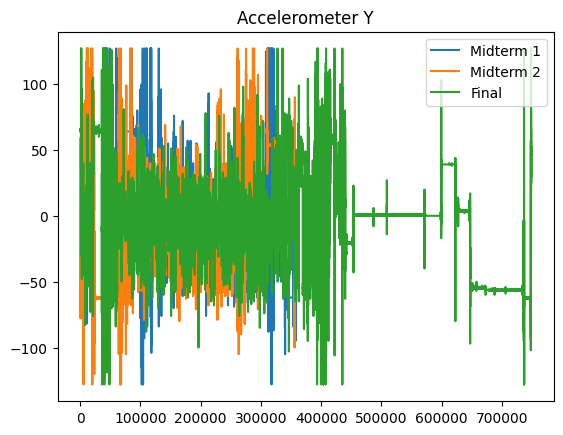

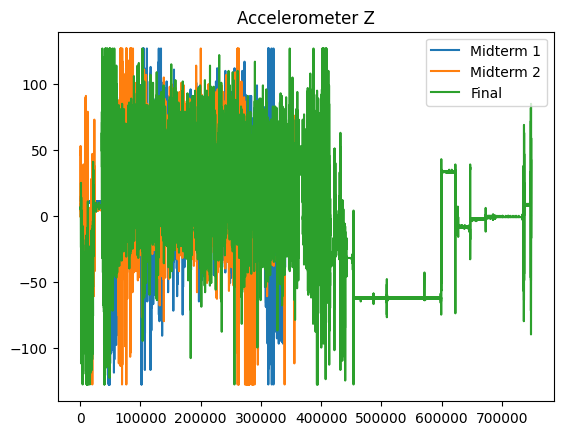

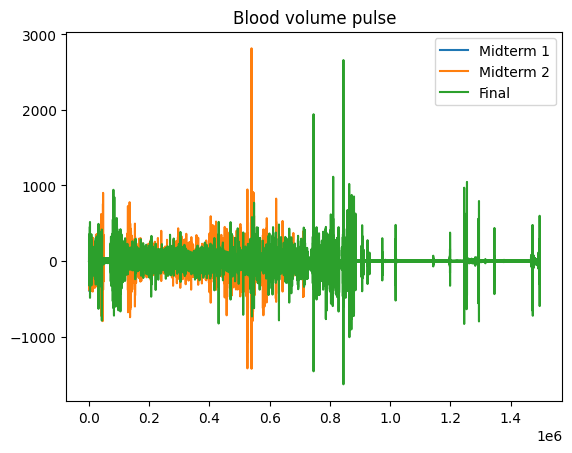

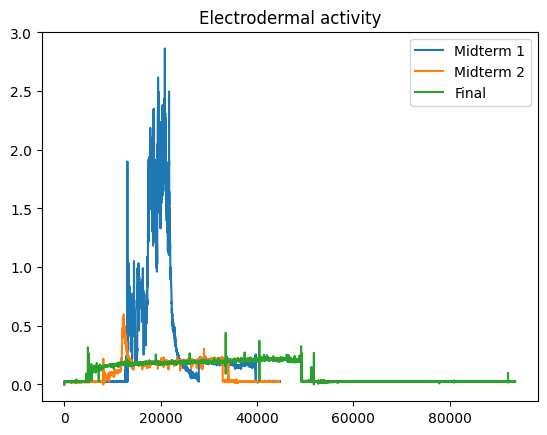

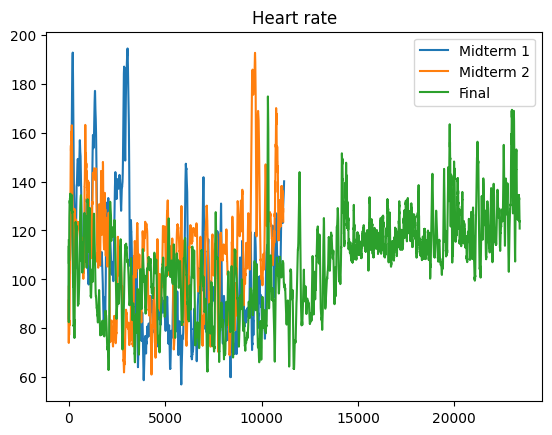

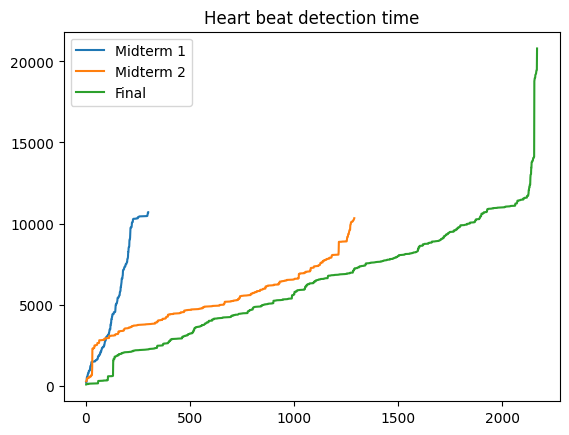

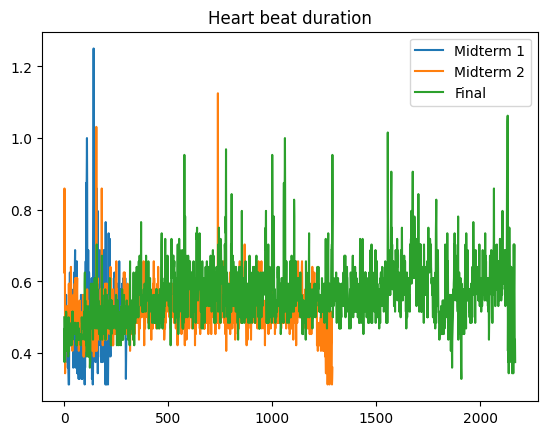

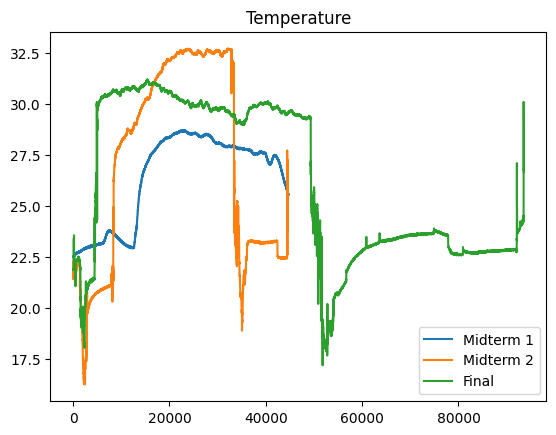

In [51]:
from matplotlib import pyplot as plt

print("Student 1, traženje potencijalnih outliera vizualizacijom")
for i in range(len(columns)):
    plt.figure()
    for j in range(len(student_exam[0])):
        plt.plot(student_exam[0][j][columns[i]], label=f"{exams[j]}")
    plt.title(f"{columns[i]}")
    plt.legend()



Vidljivo je da neki podaci poput onih s akcelerometra, i podataka o brzini otkucaja srca ima značajnih odstupanja. Lako je moguće da je do toga došlo zbog prirode samih uređaja i senzora, ali je isto tako moguće da su to realne vrijednosti jer se ovo istraživanje bavi proučavanjem stresa kod studenata tijekom ispita. Stoga, valovi adrenalina ili šokovi ne bi bili iznenađujući.

## Ocjene studenata po ispitima i vizualizacija

Prema podacima iz datoteke ``StudentGrades.txt``, izračunat je prosjek ocjena studenata po ispitima te su stupčastim dijagramima i histogramima vizualizirani rezultati studenata po ispitu.

Prosjek ocjena ispita Midterm 1: 77.5
Prosjek ocjena ispita Midterm 2: 69.9
Prosjek ocjena ispita Final: 156.7


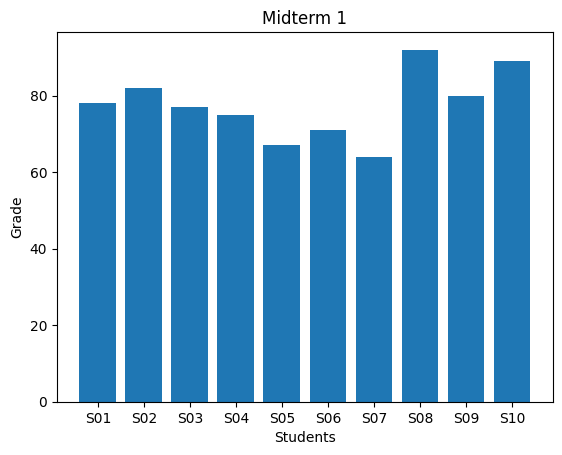

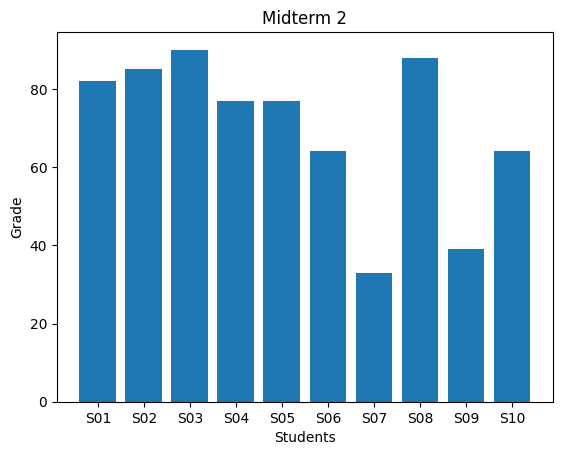

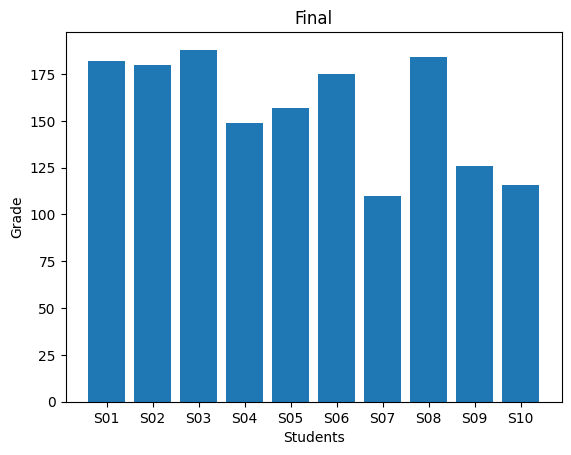

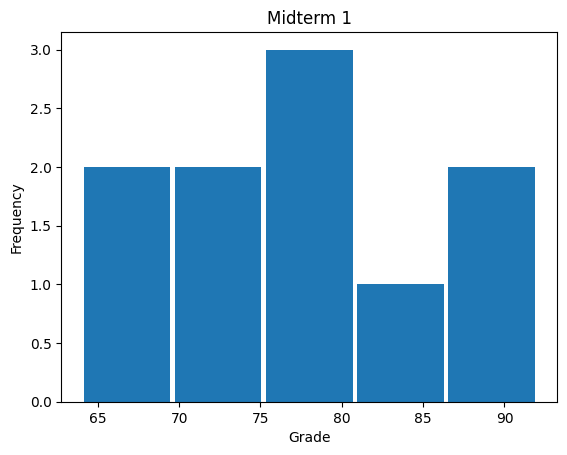

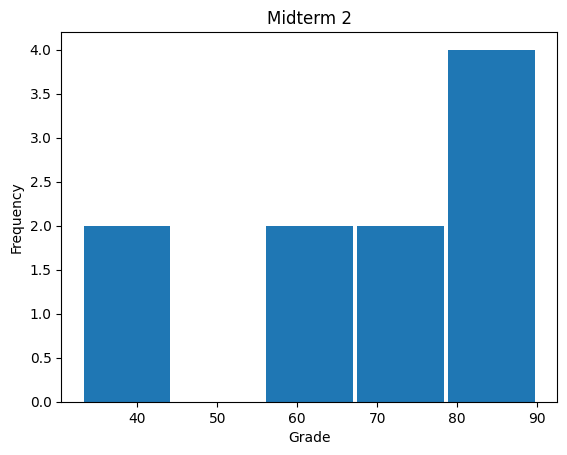

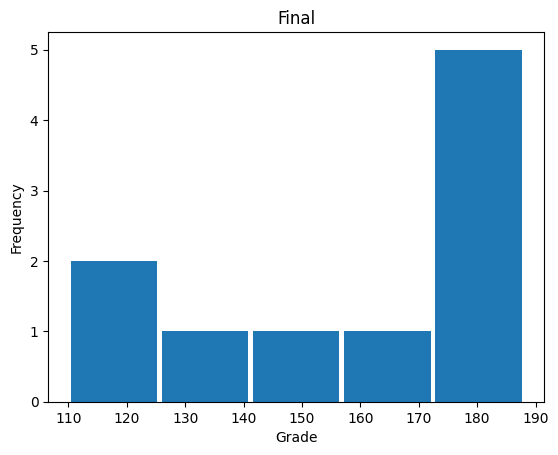

In [126]:
import statistics as stat

f = open("dataset/StudentGrades.txt","r")
sg = [i.strip() for i in f.readlines()]
sgt = list()
for i in sg:
    if not i:
        continue
    if i[0].isalnum():
        sgt.append(i)

exs = np.array_split(sgt, 3)
sts = [i.split(" ")[0] for i in exs[0][1:]]
m1grades = [int(i.split(" ")[2]) for i in exs[0][1:]]
m2grades = [int(i.split(" ")[2]) for i in exs[1][1:]]
fingrades = [int(i.split(" ")[2]) for i in exs[2][1:]]
grades = [m1grades, m2grades, fingrades]
print(f"Prosjek ocjena ispita Midterm 1: {stat.mean(m1grades)}")
print(f"Prosjek ocjena ispita Midterm 2: {stat.mean(m2grades)}")
print(f"Prosjek ocjena ispita Final: {stat.mean(fingrades)}")

dfm1 = pd.DataFrame(m1grades, index=sts)
dfm2 = pd.DataFrame(m2grades, index=sts)
dffin = pd.DataFrame(fingrades, index=sts)
dflist, ems = [dfm1, dfm2, dffin], ["Midterm 1", "Midterm 2", "Final"]
for i in range(len(grades)):
    plt.bar(sts, grades[i])
    plt.xlabel("Students")
    plt.ylabel("Grade")
    plt.title(ems[i])
    plt.show()

for i in range(len(dflist)):
    plt.hist(dflist[i], bins=5, rwidth=0.95)
    plt.xlabel("Grade")
    plt.ylabel("Frequency")
    plt.title(ems[i])
    plt.show()


Histogramima je prikazana učestalost pojedinih ocjena na trima ispitima.